<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>Plotly</h1>
<h2>Seasoned Chaos Figures</h2>
<h3>Kelsey Malloy</h3>




<div style="clear:both"></div>
</div>

<hr style="height:2px;">

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import plotly
import plotly.graph_objects as go
import plotly.io as pio
import chart_studio

# Weather Pattern Pie

In [2]:
d = {'Timescale': ['Hourly','Hourly','Day-to-day','Day-to-day','Day-to-day','Subseasonal','Subseasonal', \
...                'Subseasonal','Subseasonal','Seasonal','Seasonal','Seasonal', \
...                'Year-to-year','Year-to-year','Decadal','Decadal','Centuries','Irregular','Irregular'], \
...  'Processes': ['T-storms','Tornadoes','Fronts','Mid-latitude Cyclones','Hurricanes','Blocking','PNA', \
...                'NAO','MJO','Earth tilt','ITCZ shift','Monsoons', \
...                'ENSO','QBO','PDO','AMO','Milankovitch cycles','Volcanic Eruptions','Atmospheric Noise'], \
...  'size': [49.6,49.6,33.1,33.1,33.1,24.9,24.9,24.99,24.99,33.3,33.3,33.3,49.99,49.99,49.999,49.999,99.99999,50,50], \
...  'Details': ['T-storms','Tornadoes','Fronts','Mid-lat Cyclones','Hurricanes','Obstruction of zonal flow','Pacific-North American teleconnection', \
...              'North Atlantic Oscillation','Madden-Julian Oscillation','Earth tilt','Inter-Tropical Convergence Zone','reversing wind accompanied by corresponding changes in precipitation', \
...              'El Nino-Southern Oscillation','Quasi-biennial Oscillation','Pacific Decadal Oscillation','Atlantic Multidecadal Oscillation','Eccentricity, Obliquity, Precession','Volcanic Eruptions','Atmoshperic Noise']    }

In [3]:
df = pd.DataFrame(data=d)
df

,Timescale,Processes,size,Details
0,Hourly,T-storms,49.60000,T-storms
1,Hourly,Tornadoes,49.60000,Tornadoes
2,Day-to-day,Fronts,33.10000,Fronts
3,Day-to-day,Mid-latitude Cyclones,33.10000,Mid-lat Cyclones
4,Day-to-day,Hurricanes,33.10000,Hurricanes
5,Subseasonal,Blocking,24.90000,Obstruction of zonal flow
6,Subseasonal,PNA,24.90000,Pacific-North American teleconnection
7,Subseasonal,NAO,24.99000,North Atlantic Oscillation
8,Subseasonal,MJO,24.99000,Madden-Julian Oscillation
9,Seasonal,Earth tilt,33.30000,Earth tilt


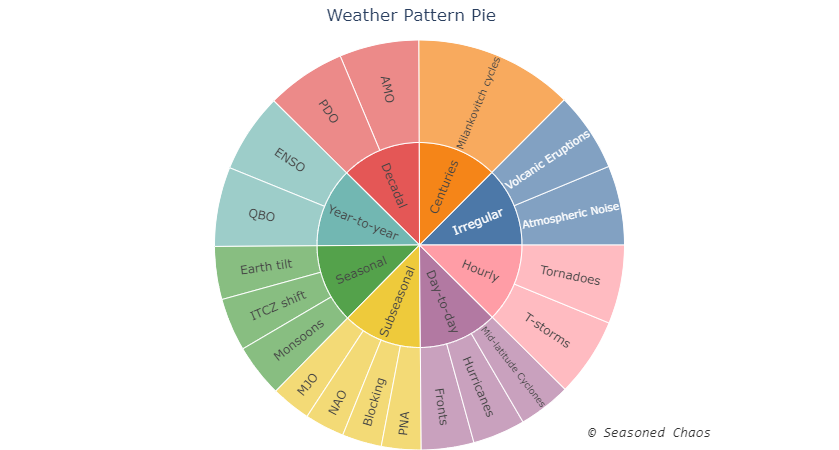

In [25]:
import plotly.express as px

my_text = ['Atlantic Multidecadal Oscillation: fluctuations in<br>North Atlantic Ocean sea surface temperatures',
           'Noise is a fancier word for unpredictable chaos,<br>kinda like we talked about in the first blog!',
           'Obstruction of west-to-east flow; see previous blog!', 
           'El Nino-Southern Oscillation: fluctuations of<br>tropical Pacific sea surface temperatures',
           'Hemisphere receives more or less direct sunlight<br>in summer or winter months',
           'Boundary of air masses;<br>types are cold, warm, stationary, occluded',
           'Strong, closed low pressure system that<br>originates in the tropics;<br>topic of next blog!',
           'Inter-Tropical Convergence Zone: belt of clouds<br>& storminess that circles the globe & follows trade<br>winds',
           'Madden-Julian Oscillation: tropical, eastward-moving<br>band of clouds & rainfall sandwiched between two dry<br>systems;<br>our topic of this blog!',
           'Low pressure system outside the tropics',
           'Earth\'s eccentricity (orbit), obliquity (change in tilt),<br>& precession (wobble)',
           'Reversal of winds accompanied by corresponding<br>changes in precipitation',
           'North Atlantic Oscillation: fluctuations in<br>atmospheric pressure at sea level between the<br>Icelandic Low (N Atl.) and the Azores High<br>(subtropical Atl.)',
           'Pacific Decadal Oscillation: fluctuations in<br>North Pacific sea surface temperatures',
           'Pacific-North American pattern: fluctuations in<br>upper-level pressure between eastern North Pacific<br>and North America',
           'Quasi-biennial Oscillation: fluctuations in<br>direction (east-to-west or west-to-east) of equatorial<br>winds in the stratosphere;<br>usually reverses every 2 years',
           'Thunderstorm, the thing that scares your dog','Rapidly rotating column of air that touches ground',
           'Volcanoes add a lot of ash<br>and gases to the atmosphere,<br>triggering storms in regions close by;<br>if strong enough, they contribute<br>a cooling effect for global climate<br>for up to a few years',
           'Forecasting out hundreds and thousands of years,<br>past the time a human lives',
           'Forecasting weather for today vs. tomorrow vs. Friday','Forecasting out 7+ years',
           'Forecasting within a day','No set forecast time scale, more unpredictable',
           'Forecasting out a season, like summer or winter',
           'Forecasting out past two weeks but no longer than a few months',
           'Forecasting a general season for this year vs. next year',
           ]

fig = px.sunburst(df, path=['Timescale','Processes'], values='size', color_discrete_sequence=px.colors.qualitative.T10)
fig.update_traces(insidetextorientation='radial')
fig.update_traces(customdata=my_text,hovertemplate="%{customdata}")
fig.update_layout(title={
        'text': "Weather Pattern Pie",
        'y':0.98,
        'x':0.49,
        'xanchor': 'center',
        'yanchor': 'top'})
# -*- coding: utf-8 -*-
fig.add_annotation(
            x=0.85,
            y=0.02,
            xref="paper",
            yref="paper",
            text="<i>\xa9 Seasoned Chaos</i>",
            showarrow=False, opacity=.8,
            font=dict(
                family="Dill Alternate,monospace",
                size=14,
                color="black"
            ))
fig.update_layout(margin = dict(t=40, l=0, r=0, b=0))
fig.update_layout(hoverlabel=dict(font=dict(family='sans-serif', size=12)))
fig.show(renderer='plotly_mimetype')


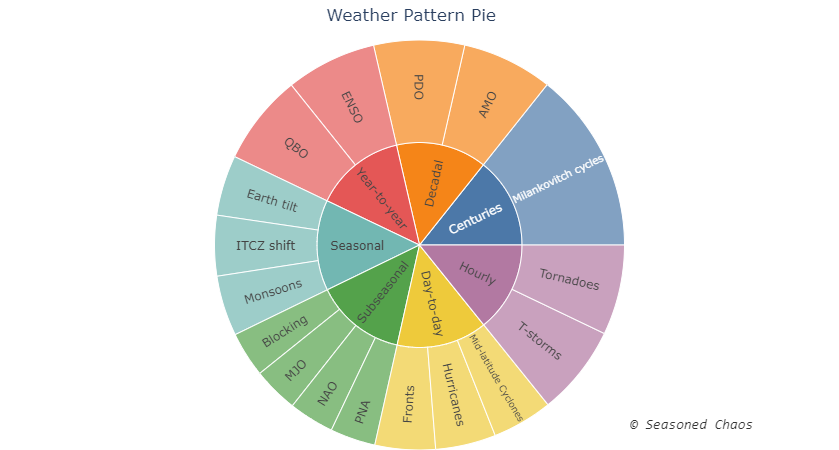

In [5]:
import plotly.express as px

my_text = ['Atlantic Multidecadal Oscillation: fluctuations in North Atlantic Ocean sea surface temperatures',
           'Obstruction of west-to-east flow', 
           'El Nino-Southern Oscillation: fluctuations of tropical Pacific sea surface temperatures',
           'Hemisphere receives more or less direct sunlight in summer or winter months',
           'Boundary of air masses; types are cold, warm, stationary, occluded',
           'Strong, closed low pressure system that originates in the tropics',
           'Inter-Tropical Convergence Zone: belt of clouds & storminess that circles the globe & follows trade winds',
           'Madden-Julian Oscillation: tropical, eastward-moving band of clouds & rainfall sandwiched between two dry systems',
           'Low pressure system outside the tropics',
           'Earth\'s eccentricity (orbit), obliquity (change in tilt), & precession (wobble)',
           'Reversal of winds accompanied by corresponding changes in precipitation',
           'North Atlantic Oscillation: fluctuations in atmospheric pressure at sea level between the Icelandic Low (N Atl.) and the Azores High (subtropical Atl.)',
           'Pacific Decadal Oscillation: fluctuations in North Pacific sea surface temperatures',
           'Pacific-North American pattern: fluctuations in upper-level pressure between eastern North Pacific and North America',
           'Quasi-biennial Oscillation: fluctuations in direction (east-to-west or west-to-east) of equatorial winds in the stratosphere; usually reverses every 2 years',
           'Thunderstorm, the thing that scares your dog','Rapidly rotating column of air that touches ground',
           'Forecasting out hundreds and thousands of years, past the time a human lives',
           'Forecasting weather for today vs. tomorrow vs. Friday','Forecasting out 7+ years',
           'Forecasting within a day','Forecasting out a season, like summer or winter',
           'Forecasting out past two weeks but no longer than a few months','Forecasting a general season for this year vs. next year']

fig = px.sunburst(df, path=['Timescale','Processes'], values='size', color_discrete_sequence=px.colors.qualitative.T10)
fig.update_traces(insidetextorientation='radial')
fig.update_traces(customdata=my_text,hovertemplate="%{customdata}")
fig.update_layout(title={
        'text': "Weather Pattern Pie",
        'y':0.98,
        'x':0.49,
        'xanchor': 'center',
        'yanchor': 'top'})
# -*- coding: utf-8 -*-
fig.add_annotation(
            x=0.9,
            y=0.04,
            xref="paper",
            yref="paper",
            text="<i>\xa9 Seasoned Chaos</i>",
            showarrow=False, opacity=.8,
            font=dict(
                family="Dill Alternate,monospace",
                size=14,
                color="black"
            ))
fig.update_layout(margin = dict(t=40, l=0, r=0, b=0))
fig.show(renderer='plotly_mimetype')


In [26]:
username = 'kelseymalloy' # your username
api_key = 'Y6PCXzdShQDpkqv9FhN3' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [27]:
import chart_studio.plotly as py
py.plot(fig, filename = 'weather_pattern_pie', auto_open=True)

'https://plotly.com/~kelseymalloy/1/'

In [28]:
import chart_studio.tools as tls
tls.get_embed('https://plotly.com/~kelseymalloy/1/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~kelseymalloy/1.embed" height="525" width="100%"></iframe>'

In [28]:
import plotly.io as pio
pio.write_html(fig, file='../_pages/weather_pattern_pie_SC.html', auto_open=True)

In [15]:
import plotly.io as pio
pio.write_html(fig, file='../_pages/weather_pattern_pie.html', auto_open=True)

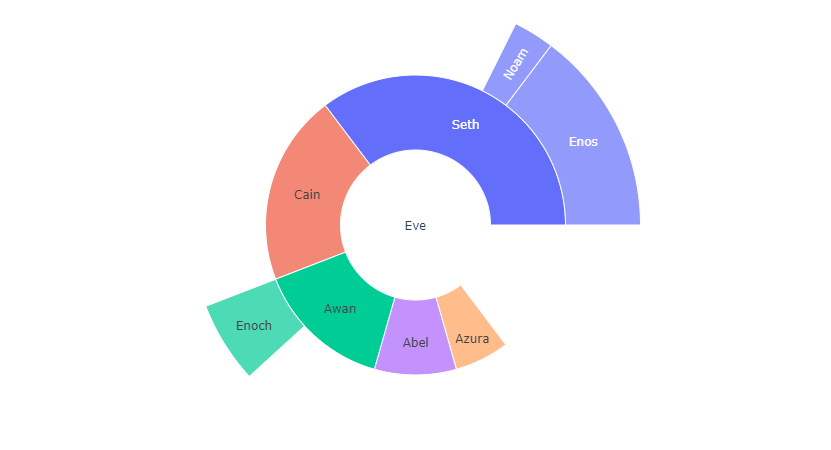

In [25]:
# original script for a sunburst

fig =go.Figure(go.Sunburst(
    labels=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    values=[10, 14, 12, 10, 2, 6, 6, 4, 4],
))
# Update layout for tight margin
# See https://plotly.com/python/creating-and-updating-figures/
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show(renderer='plotly_mimetype')